In [35]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [36]:
# reading my data from file csv
wine = pd.read_csv('data_wine.csv')
wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<Axes: xlabel='quality', ylabel='fixed acidity'>

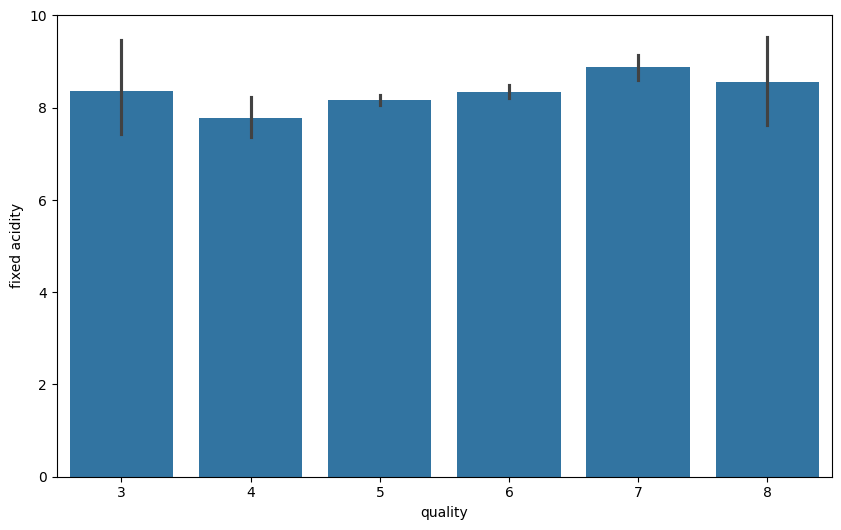

In [37]:

fig = plt.figure(figsize = (10,6))  # Create a new figure with a specific size (10 inches wide, 6 inches tall)
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)  # Create a bar plot showing average 'fixed acidity' for each 'quality' level in the 'wine' DataFrame


<Axes: xlabel='quality', ylabel='residual sugar'>

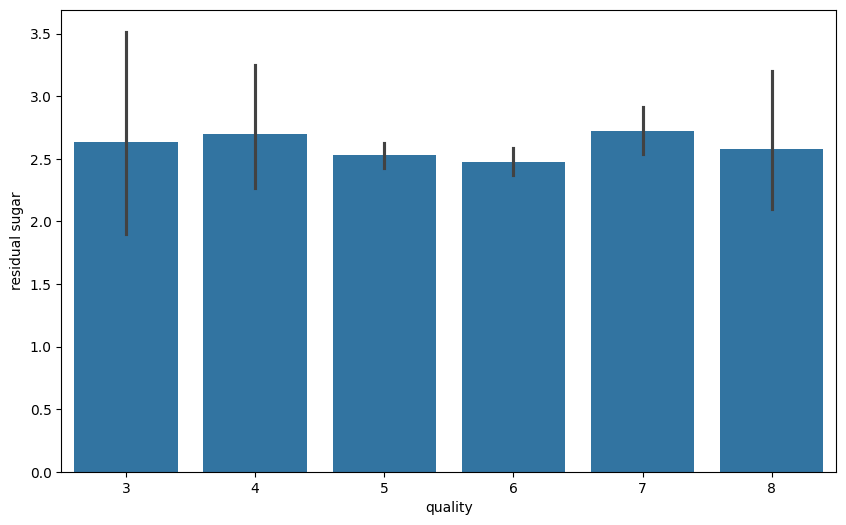

In [38]:
fig = plt.figure(figsize = (10,6))  # Create a new figure with dimensions 10x6 inches
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)  # Plot a bar chart showing the average 'residual sugar' for each wine 'quality' level from the 'wine' DataFrame


In [39]:
bins = (2, 6.5, 8)  # Define bin edges to group wine quality scores into categories
group_names = ['bad', 'good']  # Define labels for each bin: 'bad' for lower quality, 'good' for higher quality
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)  # Replace numerical 'quality' with categorical labels based on the defined bins


In [40]:
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [41]:
label_quality = LabelEncoder() # Create an instance of LabelEncoder to convert categorical labels (e.g., 'bad', 'good') into numeric form

In [42]:
wine['quality'] = label_quality.fit_transform(wine['quality'])  # Encode the 'quality' column: convert categorical labels ('bad', 'good') into numeric values (e.g., 0, 1)
wine['quality'].value_counts()  # Count the number of occurrences of each encoded quality label


quality
0    1382
1     217
Name: count, dtype: int64

In [43]:
X = wine.drop('quality', axis = 1)  # Define feature set 'X' by dropping the 'quality' column from the dataset
y = wine['quality']  # Define target variable 'y' as the 'quality' column


In [44]:
# Split the dataset into training and testing sets
# 80% of the data is used for training, and 20% for testing (test_size = 0.2)
# random_state = 42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
sc = StandardScaler()  # Create a StandardScaler object to normalize the feature data (zero mean, unit variance)
X_train = sc.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test = sc.fit_transform(X_test)  # Incorrect: This fits the scaler again on test data, which should not be done

# Note: Instead of fitting the scaler again on X_test, use transform:
# X_test = sc.transform(X_test)
# This ensures that the test data is scaled using the same parameters as the training data


In [46]:
rfc = RandomForestClassifier(n_estimators=200)  # Create a Random Forest Classifier with 200 decision trees (estimators)
rfc.fit(X_train, y_train)  # Train the model on the scaled training data
pred_rfc = rfc.predict(X_test)  # Predict the target values for the test data using the trained model


In [47]:
print("Accuaracy score =",accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))


Accuaracy score = 0.875
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

    accuracy                           0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



In [48]:
#importing logistic regression library
from sklearn.linear_model import LogisticRegression

In [49]:
# creating instance of the model and training the model
logs=LogisticRegression()
logs.fit(X_train,y_train)

LogisticRegression()

In [50]:
#Predict the target values for the test data using the trained model
pred_logs=logs.predict(X_test)

In [51]:
print('Accuracy: ',accuracy_score(y_test,pred_logs))
print(classification_report(y_test, pred_logs))

Accuracy:  0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [52]:
svc = SVC()  # Create a Support Vector Classifier (SVC) with default parameters
svc.fit(X_train, y_train)  # Train the SVC model on the scaled training data
pred_svc = svc.predict(X_test)  # Predict the target values for the test data using the trained SVC model


In [53]:
print("Accuaracy score =",accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

Accuaracy score = 0.875
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.38        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [54]:
param = {
    'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],  # List of regularization parameter values to try
    'kernel': ['linear', 'rbf'],                  # List of kernel types to test: linear and radial basis function
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]  # List of kernel coefficient values to try
}
grid_svc = GridSearchCV(svc, param, cv=10, verbose=2)  
# Initialize GridSearchCV to tune SVC hyperparameters using 10-fold cross-validation
# verbose=2 enables detailed output during the search process


In [55]:
# train the model
grid_svc.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [56]:
pred = grid_svc.predict(X_test)
print("Accuaracy score =", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuaracy score = 0.896875
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [57]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10, verbose=2)
rfc_eval.mean()

[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s


0.9093257874015748